In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 5

In [2]:
data = pd.read_csv('C:\\Users\\DVM\\Downloads\\AirPassengers.csv')
print (data.head())
print( '\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data = pd.read_csv('C:\\Users\\DVM\\Downloads\\AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print (data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [5]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [8]:
ts['1949-02-01']

118

In [9]:
from datetime import datetime
ts[datetime(1949,2,1)]

118

In [10]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [11]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [12]:
ts["1949"]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [13]:
ts["1950"]

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

D:\anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


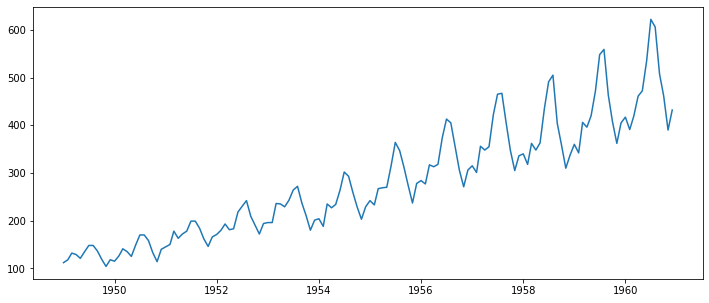

In [14]:
plt.figure(figsize=(12,5))
plt.plot(ts)

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    
    plt.figure(figsize=(12,5))
    orig = plt.plot(timeseries, color='brown',label='Original')
    mean = plt.plot(rolmean, color='green', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
   
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

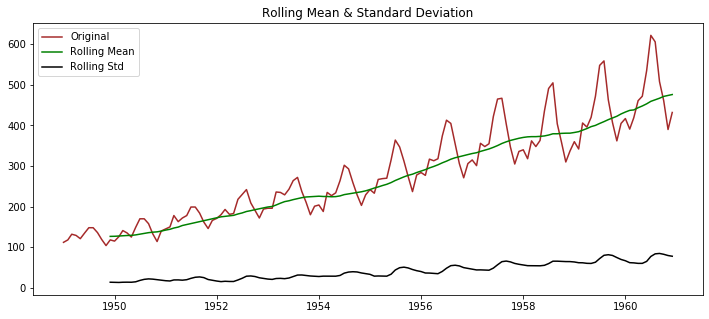

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
test_stationarity(ts)

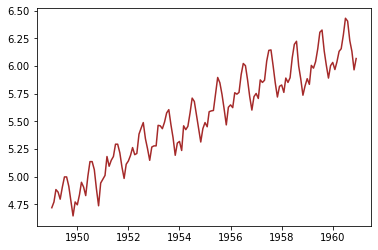

In [17]:
ts_log = np.log(ts)
plt.plot(ts_log,color="brown")

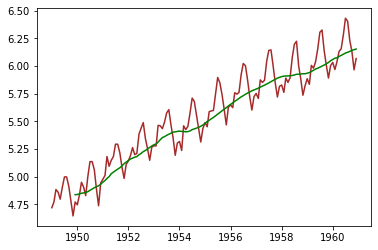

In [18]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log,color="brown")
plt.plot(moving_avg, color='green')

In [20]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

In [21]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

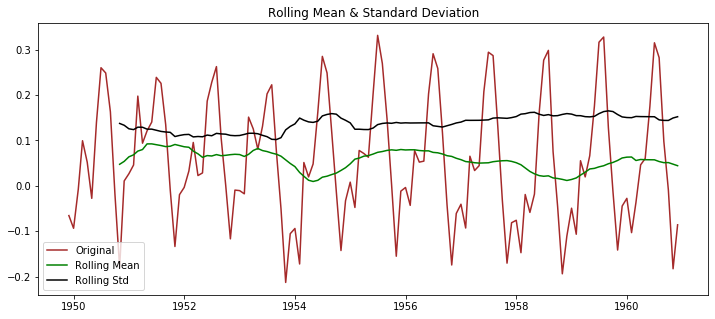

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [22]:
test_stationarity(ts_log_moving_avg_diff)

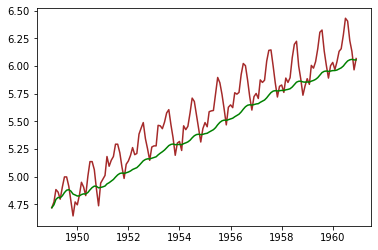

In [24]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log,"brown")
plt.plot(expwighted_avg, color='green')

In [25]:
expwighted_avg

Month
1949-01-01    4.718499
1949-02-01    4.745345
1949-03-01    4.793835
1949-04-01    4.811785
1949-05-01    4.808206
1949-06-01    4.826807
1949-07-01    4.855564
1949-08-01    4.877049
1949-09-01    4.881978
1949-10-01    4.868821
1949-11-01    4.842036
1949-12-01    4.834027
1950-01-01    4.824557
1950-02-01    4.825744
1950-03-01    4.837657
1950-04-01    4.843949
1950-05-01    4.842546
1950-06-01    4.856559
1950-07-01    4.880081
1950-08-01    4.901033
1950-09-01    4.913937
1950-10-01    4.912097
1950-11-01    4.898667
1950-12-01    4.901883
1951-01-01    4.907382
1951-02-01    4.914838
1951-03-01    4.933808
1951-04-01    4.945007
1951-05-01    4.958991
1951-06-01    4.974181
                ...   
1958-07-01    5.832405
1958-08-01    5.854442
1958-09-01    5.862700
1958-10-01    5.863859
1958-11-01    5.856708
1958-12-01    5.854650
1959-01-01    5.856417
1959-02-01    5.855203
1959-03-01    5.863694
1959-04-01    5.870306
1959-05-01    5.879851
1959-06-01    5.895416
1959-

In [26]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
1949-11-01    4.644391
1949-12-01    4.770685
1950-01-01    4.744932
1950-02-01    4.836282
1950-03-01    4.948760
1950-04-01    4.905275
1950-05-01    4.828314
1950-06-01    5.003946
1950-07-01    5.135798
1950-08-01    5.135798
1950-09-01    5.062595
1950-10-01    4.890349
1950-11-01    4.736198
1950-12-01    4.941642
1951-01-01    4.976734
1951-02-01    5.010635
1951-03-01    5.181784
1951-04-01    5.093750
1951-05-01    5.147494
1951-06-01    5.181784
                ...   
1958-07-01    6.196444
1958-08-01    6.224558
1958-09-01    6.001415
1958-10-01    5.883322
1958-11-01    5.736572
1958-12-01    5.820083
1959-01-01    5.886104
1959-02-01    5.834811
1959-03-01    6.006353
1959-04-01    5.981414
1959-05-01    6.040255
1959-06-01    6.156979
1959-

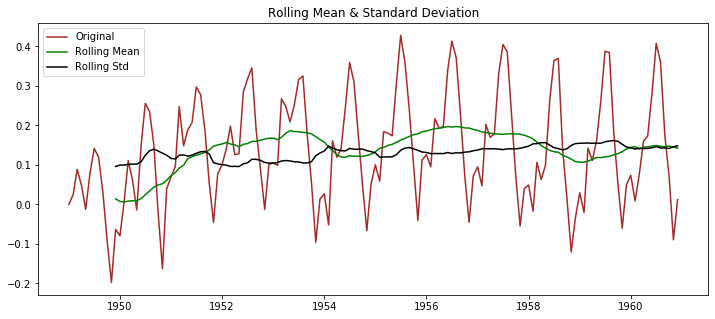

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [27]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

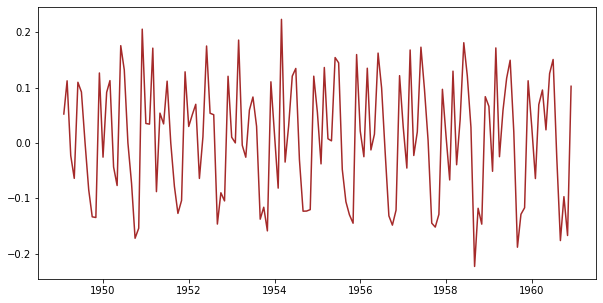

In [29]:
plt.figure(figsize=(10,5))
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff,color="brown")

<Figure size 1080x720 with 0 Axes>

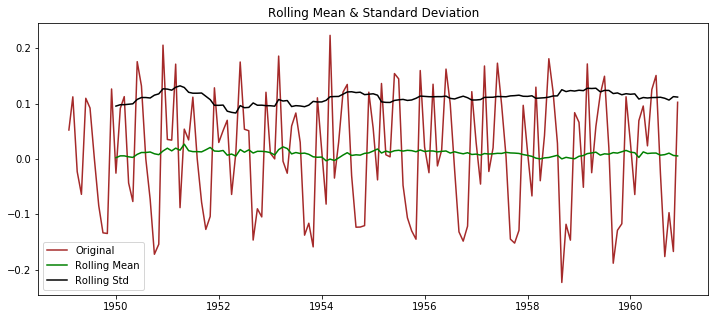

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [31]:
plt.figure(figsize=(15,10))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

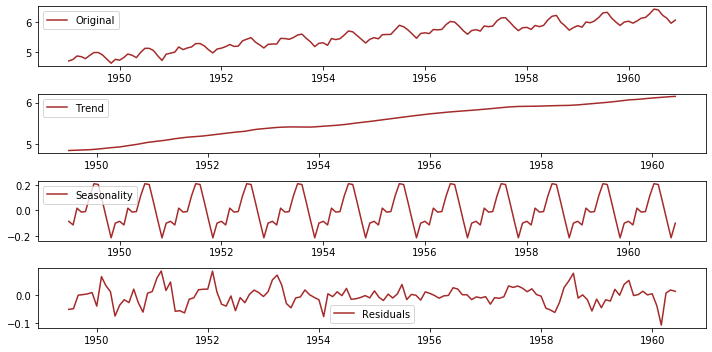

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,5))
plt.subplot(411)
plt.plot(ts_log, label='Original',color="brown")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend',color='brown')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality',color="brown")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals',color='brown')
plt.legend(loc='best')
plt.tight_layout()

<Figure size 864x360 with 0 Axes>

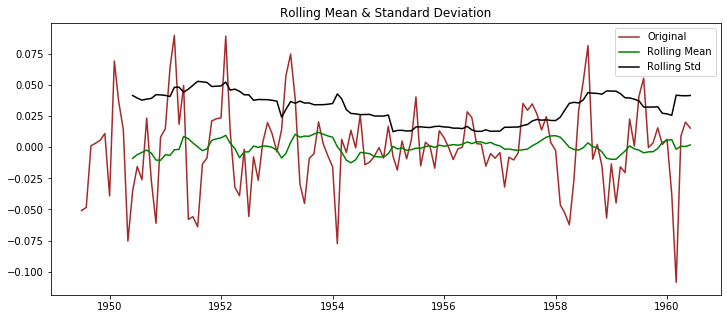

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [33]:
plt.figure(figsize=(12,5))
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

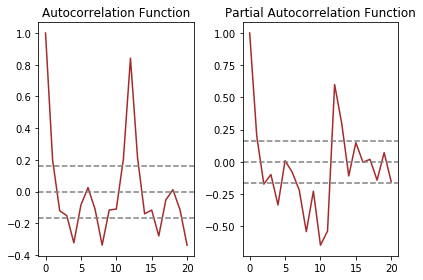

In [34]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')


plt.subplot(121)    
plt.plot(lag_acf,color='brown')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


plt.subplot(122)
plt.plot(lag_pacf,color="brown")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

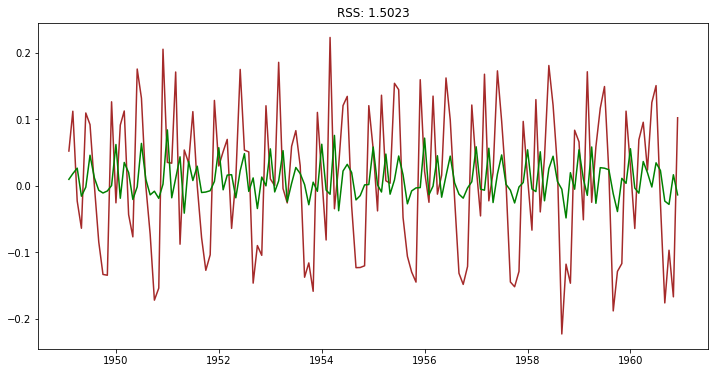

In [35]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff,color="brown")
plt.plot(results_AR.fittedvalues, color='green')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

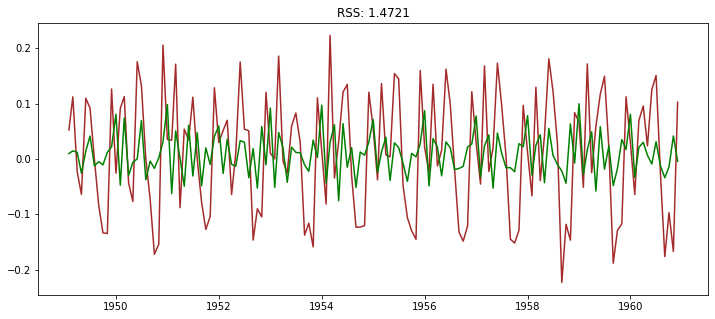

In [36]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(12,5))
plt.plot(ts_log_diff,color="brown")
plt.plot(results_MA.fittedvalues, color='green')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

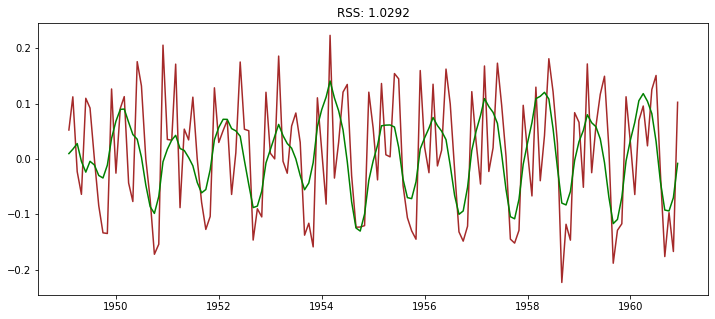

In [37]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(12,5))
plt.plot(ts_log_diff,color="brown")
plt.plot(results_ARIMA.fittedvalues, color='green')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [39]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [40]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [42]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [43]:
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [44]:
ts_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64

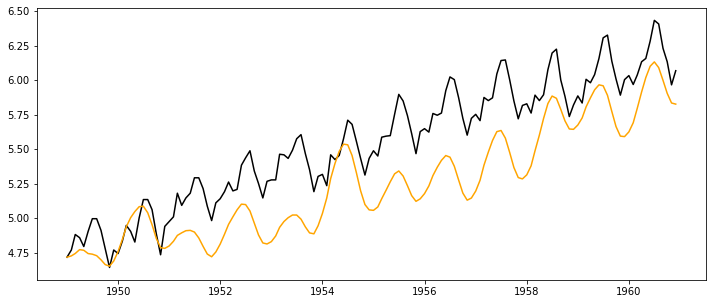

In [45]:
plt.figure(figsize=(12,5))
plt.plot(ts_log,"black")
plt.plot(predictions_ARIMA_log,color="orange")

Text(0.5, 1.0, 'RMSE: 90.1045')

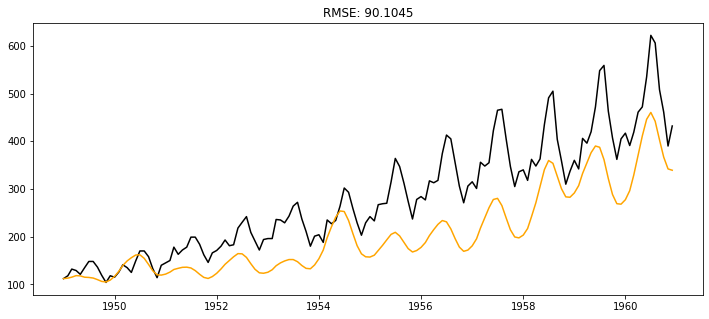

In [46]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(12,5))
plt.plot(ts,color="black")
plt.plot(predictions_ARIMA,color="orange")
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [47]:
predictions_ARIMA

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073417
1949-04-01    118.301997
1949-05-01    117.768372
1949-06-01    114.988277
1949-07-01    114.489525
1949-08-01    113.239583
1949-09-01    109.900658
1949-10-01    106.177211
1949-11-01    104.986411
1949-12-01    108.966779
1950-01-01    116.650000
1950-02-01    127.563224
1950-03-01    139.580499
1950-04-01    149.126259
1950-05-01    155.842636
1950-06-01    161.469124
1950-07-01    161.970493
1950-08-01    154.514331
1950-09-01    141.731442
1950-10-01    128.440895
1950-11-01    120.015700
1950-12-01    119.389954
1951-01-01    121.483678
1951-02-01    125.687108
1951-03-01    131.151981
1951-04-01    133.633959
1951-05-01    135.688825
1951-06-01    136.026988
                 ...    
1958-07-01    359.622747
1958-08-01    353.749832
1958-09-01    326.603971
1958-10-01    300.547295
1958-11-01    283.364942
1958-12-01    282.611484
1959-01-01    291.567682
1959-02-01    306.960001
1959-03-01    332.4

In [48]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


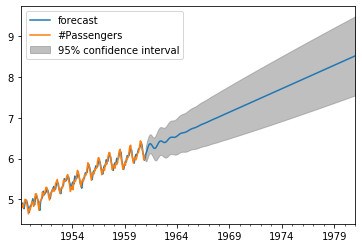

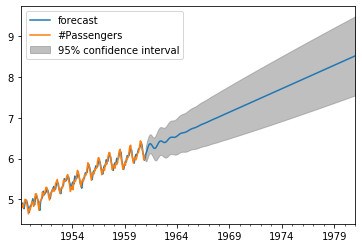

In [49]:
results_ARIMA.plot_predict(1,384)

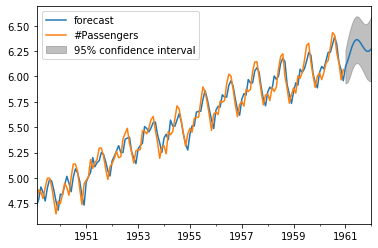

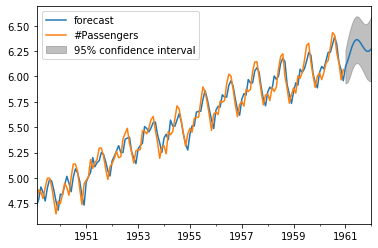

In [50]:
results_ARIMA.plot_predict(1,156)

In [51]:
x=results_ARIMA.forecast(steps=156)

In [52]:
x

(array([6.09553406, 6.15281429, 6.22442997, 6.2924113 , 6.34164736,
        6.36359367, 6.35784677, 6.33139285, 6.29597517, 6.26447694,
        6.24738317, 6.25025176, 6.27275854, 6.30940339, 6.35151523,
        6.3898868 , 6.41727396, 6.43011056, 6.42906679, 6.41842471,
        6.40456136, 6.39403601, 6.39183078, 6.4001951 , 6.41833709,
        6.4429543 , 6.46937459, 6.49294005, 6.51024129, 6.51989034,
        6.52267571, 6.52112375, 6.51864515, 6.51853682, 6.52311922,
        6.53322368, 6.54812884, 6.56591575, 6.58410326, 6.60036553,
        6.61313274, 6.62192782, 6.62737784, 6.63093122, 6.63438683,
        6.63937982, 6.64696507, 6.65739849, 6.67015337, 6.68414265,
        6.69806639, 6.71077911, 6.72157738, 6.73033985, 6.73749809,
        6.74386376, 6.75037321, 6.75782594, 6.76668687, 6.77699831,
        6.78841329, 6.80032865, 6.81207205, 6.82308768, 6.83307141,
        6.84202495, 6.85022313, 6.85811222, 6.86617342, 6.87479154,
        6.88416308, 6.89426391, 6.90487898, 6.91